Text(0.5, 0, 'Time')

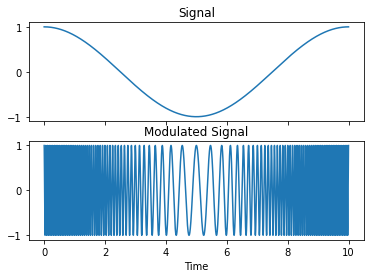

In [12]:

import numpy as np
import matplotlib.pyplot as plt

#%% signal generation
fn = 500 # Nyquist Frequency
fs = 2*fn # sampling frequency
t = np.arange(0, 10, 1/fs) # time axis

f_sig = 0.1 # base signal frequency
sig = np.cos(2*np.pi*f_sig*t) # base signal

#%% modulation
fc = 10 # carrier frequency
k = 0.05 # sensitivity
phi = 2*np.pi*fc*t + k*np.cumsum(sig) # phase

sig_mod = np.cos(phi) # modulated signal

#%% plotting
fig, ax = plt.subplots(2, 1, num=0, clear=True, sharex=True)

ax[0].set_title('Signal')
ax[0].plot(t, sig)

ax[1].set_title('Modulated Signal')
ax[1].plot(t, sig_mod)
ax[1].set_xlabel('Time')





Text(0.5, 0, 'Time')

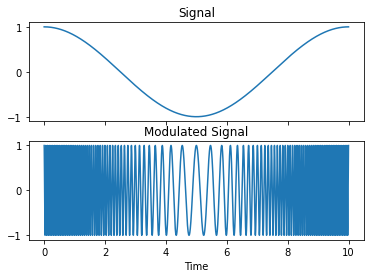